## Harmonic Oscillator 


### 1. Launch packages 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from   numpy import fft      
import scipy.fftpack as fftpack
from scipy.special import laguerre
import h5py

In [2]:
%pylab inline

# Set labels' font size

plt.rcParams.update({'axes.labelsize': 26 })
plt.rcParams.update({'legend.fontsize': 17 })
plt.rcParams.update({'xtick.labelsize': 15 })
plt.rcParams.update({'ytick.labelsize': 15 })


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### 2. Specify System's Quantum Parameters

In [3]:
X_gridDIM =  256     # Discretization grid size in X
P_gridDIM =  256     # Discretization grid size in P
        
X_amplitude  = 16    # Window range [-X_amplitude, X_amplitude]
P_amplitude  = 16    # Window range [-P_amplitude, P_amplitude]
        
dt= 0.01             # Time discretization
timeSteps = 500      # Number of iterations
hbar = 1             # Planck's constant


timeRange     =  np.array(range(0,timeSteps+1))*dt        
print 'Simulation time = ', np.max(timeRange) ,'(a.u.)'

Simulation time =  5.0 (a.u.)


### 3. Build discretization resolution & coordinates

In [4]:
# Discretization resolution

dX =  2.*X_amplitude/float(X_gridDIM)
dP =  2.*P_amplitude/float(P_gridDIM)

dTheta  = 2.*np.pi/(2.*P_amplitude)
Theta_amplitude = dTheta*P_gridDIM/2.

dLambda = 2.*np.pi/(2.*X_amplitude)
Lambda_amplitude = dLambda*X_gridDIM/2.

# Vectors with range of coordinates

X_range      =  fftshift(np.linspace(-X_amplitude      , X_amplitude  -dX , X_gridDIM ))
Lambda_range =  fftshift(np.linspace(-Lambda_amplitude , Lambda_amplitude-dLambda  , X_gridDIM))

P_range      = fftshift(np.linspace(-P_amplitude      , P_amplitude-dP           , P_gridDIM))
Theta_range  = fftshift(np.linspace(-Theta_amplitude  , Theta_amplitude - dTheta , P_gridDIM))

# Matrices of grid of coordinates [p,x]

X      = (X_range)[np.newaxis,:]
P      = (P_range)[:,np.newaxis]
Lambda = (Lambda_range)[np.newaxis,:]
Theta  = (Theta_range)[:,np.newaxis]

# Print resolution features

print "Resolution features : "
print ""
print "dX =", dX ,"                            dP = ",dP
print ""
print "X_amplitude =+-",X_amplitude, "                    P_amplitude = +-",P_amplitude
print ""
print "dLambda =" ,dLambda ,"              dTheta =",dTheta
print ""
print "Lambda_amplitude =+-",Lambda_amplitude,"    Theta_amplitude =+-",Theta_amplitude

Resolution features : 

dX = 0.125                             dP =  0.125

X_amplitude =+- 16                     P_amplitude = +- 16

dLambda = 0.196349540849               dTheta = 0.196349540849

Lambda_amplitude =+- 25.1327412287     Theta_amplitude =+- 25.1327412287


### 4. Set up the Kinetic and Potential terms

In [5]:

# Potential's parameters in atomic units (a.u.)

mass = 1
omega = 1


def Kinetic(p):
    """
    Kinetic Energy function   
    """
    return p**2/(2*mass)


def Potential(x):
    """
    Potential  function   
    """
    return 0.5*mass*omega**2*x**2 

            
def dPotentialdx(x):
    """
    dPotential/dx  function   
    """
    return mass*omega**2*x 


### 4.1 Potential plot

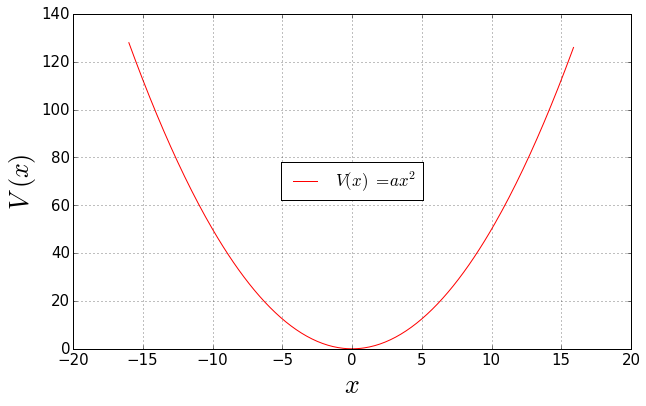

In [6]:
plt.figure(figsize=(10,6))
plt.plot( ifftshift(X_range), Potential(ifftshift(X_range)) ,"r",label = '$V(x) \\ = ax^2 $' )
xlabel('$x$')
ylabel('$V \\ (x)$')
legend(loc = "center")
grid('on')

### 5. Plot functions

In [12]:

def PlotWigner(W):
    """
    Display the Wigner function plot.
    
    W -> Wigner fuction.
    
    H -> Classical Hamiltonian.
    """
    import scipy.fftpack as fftpack
    
    print "Imaginary volume = ",np.sum(np.abs(np.imag(W)))
    
    Classical_hamiltonian = fftshift( Kinetic(P) + Potential(X) )
    
    W = fftpack.fftshift( W.real )
    
    plt.figure(figsize=(10,7))
    
    global_color_max = np.max(W)     # Maximum value used at the colorbar
    
    global_color_min = -0.1          # Minimum value used at the colorbar
               
    zero_position =  abs( global_color_min) / (abs( global_color_max) + abs(global_color_min)) 
    
    wigner_cdict = {'red' 	: 	((0., 0., 0.),
							(zero_position, 1., 1.), 
							(1., 1., 1.)),
					'green' :	((0., 0., 0.),
							(zero_position, 1., 1.),
							(1., 0., 0.)),
					'blue'	:	((0., 1., 1.),
							(zero_position, 1., 1.),
							(1., 0., 0.)) }
    wigner_cmap = matplotlib.colors.LinearSegmentedColormap('wigner_colormap', wigner_cdict, 256)

    fig, ax = plt.subplots(figsize=(12, 5))
    
    x_min = -X_amplitude
    
    x_max = X_amplitude - dX
    
    p_min = -P_amplitude
    
    p_max = P_amplitude - dP
    
    cax = ax.imshow( W ,origin='lower',interpolation='none',
                    extent=[ x_min , x_max, p_min, p_max],
                    vmin= global_color_min, vmax=global_color_max, cmap=wigner_cmap)
    
    cbar = fig.colorbar(cax, ticks=[-0.2,-0.1, 0, 0.1, 0.2 , 0.3])
    
    xlabel("$x  \\ (a.u.) $")
    
    ylabel("$p  \\ (a.u.)$")
    
    ax.contour( Classical_hamiltonian  ,arange(0, 200 , 1 ),origin='lower',
                extent=[x_min,x_max,p_min,p_max],
                linewidths=0.25,colors='k')
    
    print 'min real value of W  = ', np.min( W ), ' max real value of W = ', np.max( W )
    
    print 'Renormalization = ', np.sum( W )*dX*dP
    
    return 


In [13]:

def Marginals_plot(W):
    """
    Plot marginals W_x and W_y 
    """
    import scipy.fftpack as fftpack
    
    print "Imaginary volume:", np.sum(np.imag(W))
    
    W = np.real(W) 
    
    # Marginals W_x
    
    W_x = np.sum( W, axis = 0 )*dP
    
    # Marginals W_p
    
    W_p = np.sum( W, axis = 1 )*dX 
    
    # Plots 
    
    plt.figure(figsize=(20,7))

    ax1 = subplot(121)
    
    plot( ifftshift(X_range) ,fftshift(W_x).real,'r', label = '$ W_{x}$' ) 
        
    xlabel('$x  (a.u.)$')
    
    ylabel('$ W_{x}$')
    
    legend(loc = "upper right")
    

    ax2 = subplot(122)
    
    plot( ifftshift(P_range),fftshift(W_p).real ,'r',label = '$ W_{p} $' )
    
    xlabel('$p  (a.u.)$')
    
    ylabel('$ W_{p} $')
    
    legend(loc = "upper right")
    
    return 
       

## 6. Propagation
### 6.1 Set the Initial state

In [14]:

def Wigner_gaussian(x,p,s):
    """
    Wigner function of a Gaussian
    x,p  : center of wave packet
    s    : Standard deviation 
    """
    return np.exp(  -( (X-x)/s )**2 -( s*(P-p) )**2  )


def  Wigner_HarmonicOscillator(n,mass,omega,x,p,X,P):
    """
    Wigner function of the Harmonic oscillator
            Parameters
            x,p  : center of wave packet
            n    : Quantum number  
    """
    r2 = mass*omega**2*((X - x))**2 + ((P - p ))**2/mass 
    return  (-1)**(n)*laguerre(n)( 2*r2  )*np.exp(-r2 )


In [15]:

# Center of the state

x_init = 1    
p_init = 0

#  Standard deviation 

s = 1.

# Quantum number

n = 0

#  Normalization

W_init = Wigner_HarmonicOscillator( n, mass, omega, x_init, p_init,X,P )     
W_init /= np.sum( W_init )*dX*dP

# Features

Probability_x_init = np.sum( W_init, axis = 0 )*dP

print "Energy: ",np.sum( (P**2/(2*mass) + Potential(X))*W_init )*dP*dX   
print "W_init renormalization norm :",np.sum( W_init )*dX*dP
print "Purity :", 2*np.pi*np.sum(W_init**2)*dX*dP


Energy:  1.0
W_init renormalization norm : 1.0
Purity : 1.0


### 6.2  Initial state plots

Imaginary volume =  0.0
min real value of W  =  6.49168577586e-238  max real value of W =  0.318309886184
Renormalization =  1.0


(-5, 5)

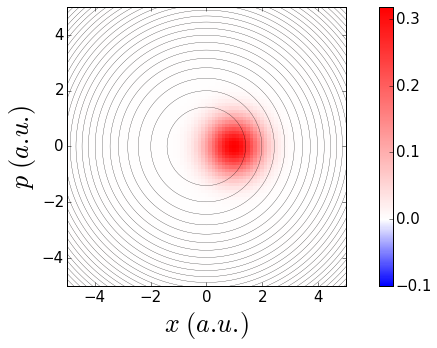

In [16]:

PlotWigner( W_init )
xlim([-5,5])
ylim([-5,5])


Imaginary volume: 0.0


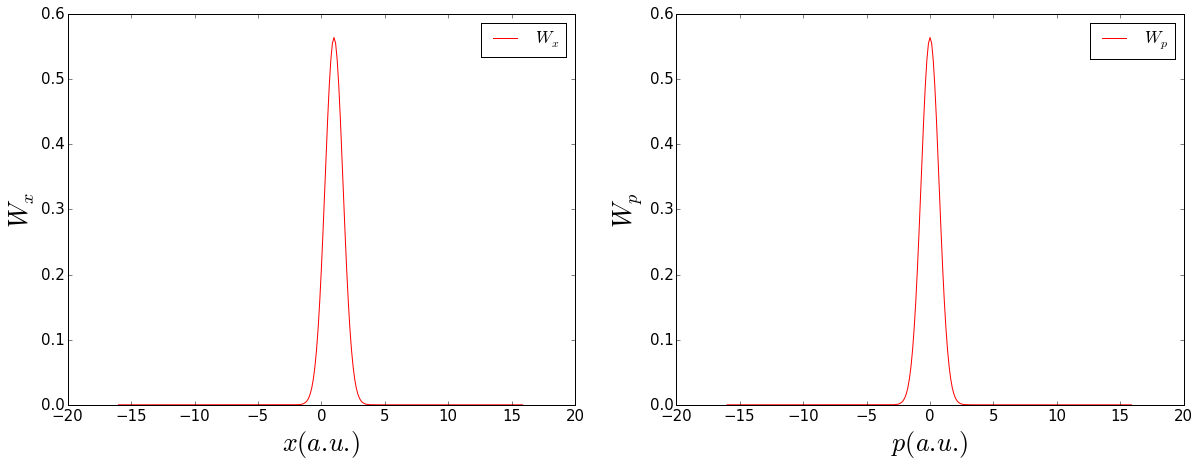

In [17]:

Marginals_plot( W_init )


### 6.3 Wigner Propagator ( 2nd order scheme )

In [18]:

# Set the inital state to be propagated

W = W_init.copy() + 0j

# Propagators factors

expPLambda = np.exp(-1j*dt*P*Lambda/mass)

expPotential =  np.exp( -1j*(dt/2) * ( Potential(X-hbar*Theta/2.) \
                                      - Potential(X+hbar*Theta/2.) )/hbar  )

In [19]:
# Lists to save expectation values

data_Expectation_X=[np.sum(X*W)*dP*dX]

data_Expectation_X2=[np.sum(X**2*W)*dP*dX]

data_Expectation_P=[np.sum(P*W)*dP*dX]

data_Expectation_P2=[np.sum(P**2*W)*dP*dX]

data_Expectation_XP=[np.sum(X*P*W)*dP*dX]

data_Expectation_PX=[np.sum(P*X*W)*dP*dX]

#------------------------------------------------------

data_Expectation_F=[-1*np.sum(dPotentialdx(X)*W)*dP*dX]

Probability_x = np.sum( W, axis = 0 )*dP

data_Expectation_PdVdX=[ np.sum( P*dPotentialdx(X)*W)*dP*dX ]

data_Expectation_XdVdX=[ np.sum( X*dPotentialdx(X)*W )*dP*dX ]

data_Expectation_V=[ np.sum( Potential(X) *W)*dP*dX ]


#-------------------------------------------------------

data_NegArea = [np.sum(W[np.nonzero( W.real < 0. )]).real*dP*dX]

data_Integral_W2 = [np.sum(W**2)*dX*dP]

# Propagator

for tIndex in range(1,timeSteps+1):
    if tIndex%100==0:
        print '  tIndex  = ', tIndex         
        
    Probability_x = np.sum( W, axis = 0 )*dP
    
    # p x -> theta x
    
    W = fftpack.fft( W, axis = 0 )
    
    W *= expPotential
    
    # theta x  -> p x
    
    W = fftpack.ifft( W, axis = 0 )
    
    # p x  ->  p lambda 
    
    W = fftpack.fft( W, axis = 1 )
    
    W *=expPLambda
    
    # p lambda -> p x 
    
    W = fftpack.ifft( W, axis = 1 )
    
    
    # p x -> theta x
    
    W = fftpack.fft( W, axis = 0 )
    
    W *= expPotential

    # theta x -> p x
    
    W = fftpack.ifft( W, axis = 0 )
    
    # Current expectations values
        
    Expectation_X = np.sum(X*W)*dP*dX
    
    Expectation_X2=np.sum(X**2*W)*dP*dX
    
    Expectation_P = np.sum(P*W)*dP*dX
    
    Expectation_P2= np.sum(P**2*W)*dP*dX
    
    Expectation_XP= np.sum(X*P*W)*dP*dX
    
    Expectation_PX= np.sum(P*X*W)*dP*dX
    
    #---------------------------------------------------
            
    Expectation_F= -1*np.sum(dPotentialdx(X)*W)*dP*dX 
        
    Expectation_XdVdX= np.sum(X*dPotentialdx(X)*W)*dP*dX 
    
    Expectation_PdVdX= np.sum(P*dPotentialdx(X)*W)*dP*dX 
    
    Expectation_V = np.sum( Potential(X)*W )*dP*dX
    
    #---------------------------------------------------
    
    Integral_W2 = np.sum(W**2)*dX*dP
    
    NegArea = np.sum(W[np.nonzero( W.real < 0. )]).real*dP*dX
        
    # Store the expectation values
      
    data_Expectation_X.append(Expectation_X)  
    
    data_Expectation_X2.append(Expectation_X2) 
    
    data_Expectation_P.append(Expectation_P)
    
    data_Expectation_P2.append(Expectation_P2) 
    
    data_Expectation_XP.append(Expectation_XP) 
    
    data_Expectation_PX.append(Expectation_PX)
    
    data_Expectation_F.append(Expectation_F)   
    
    data_Expectation_XdVdX.append(Expectation_XdVdX) 
    
    data_Expectation_PdVdX.append(Expectation_PdVdX)
    
    data_Expectation_V.append(Expectation_V)
    
    data_Integral_W2.append(Integral_W2)
    
    data_NegArea.append(NegArea)
    
#---Final state

W_end = W 
print ' "W_end" renormalization norm: ',np.sum(W_end)*dX*dP

data_Expectation_X      = np.array(data_Expectation_X).real
data_Expectation_X2     = np.array(data_Expectation_X2).real
data_Expectation_P      = np.array(data_Expectation_P).real
data_Expectation_P2     = np.array(data_Expectation_P2).real
data_Expectation_XP     = np.array(data_Expectation_XP).real
data_Expectation_PX     = np.array(data_Expectation_PX).real
data_Expectation_F      = np.array(data_Expectation_F).real
data_Expectation_XdVdX  = np.array(data_Expectation_XdVdX).real
data_Expectation_PdVdX  = np.array(data_Expectation_PdVdX).real
data_Expectation_V      = np.array(data_Expectation_V).real


  tIndex  =  100
  tIndex  =  200
  tIndex  =  300
  tIndex  =  400
  tIndex  =  500
 "W_end" renormalization norm:  (1-3.15544362088e-29j)


### 6.4 Save data

In [22]:
f1 = h5py.File("DATA_Wigner_X4.hdf5", "w")  
f1['W_end'] = W_end
f1['dP'] = dP
f1['P'] = P
f1['data_Expectation_X'] = data_Expectation_X
f1['data_Expectation_X2'] = data_Expectation_X2
f1['data_Expectation_P'] = data_Expectation_P 
f1['data_Expectation_P2'] = data_Expectation_P2 
f1['data_Expectation_XP'] = data_Expectation_XP 
f1['data_Expectation_F'] = data_Expectation_F
f1['data_Expectation_XdVdX'] = data_Expectation_XdVdX
f1['data_Expectation_PdVdX'] = data_Expectation_PdVdX
f1['data_Expectation_V'] = data_Expectation_V
f1.close() 

### 6.5 Final Wigner state plots

Imaginary volume =  2.85343639227e-11
min real value of W  =  -2.93388396778e-15  max real value of W =  0.317412511283
Renormalization =  1.0


(-5, 5)

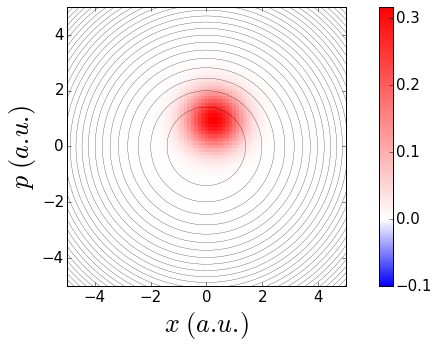

In [23]:

PlotWigner( W_end )
xlim([-5,5])
ylim([-5,5])


Imaginary volume: -2.01948391737e-27


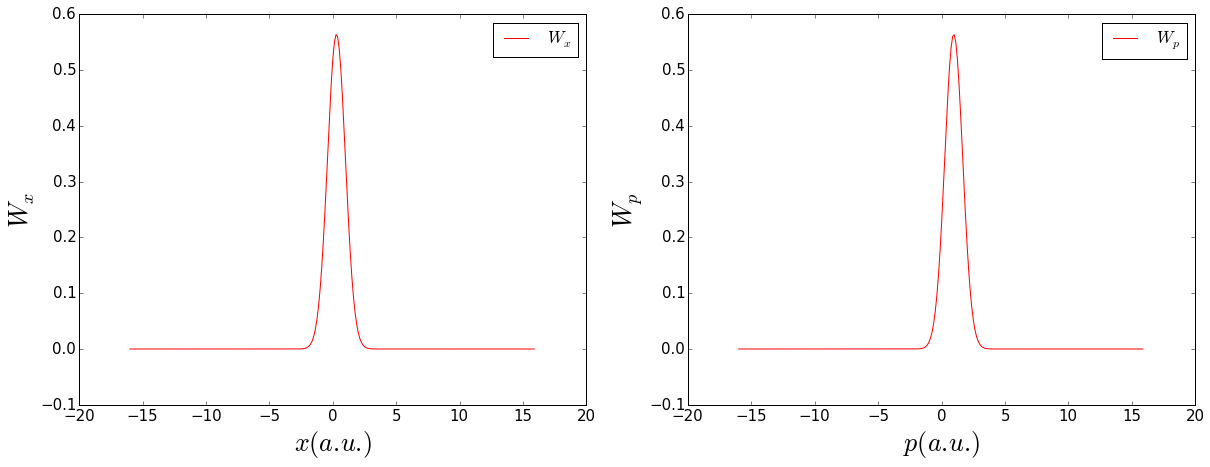

In [24]:

Marginals_plot( W_end )


### 7. Energy plots
### 7.1 Total energy 

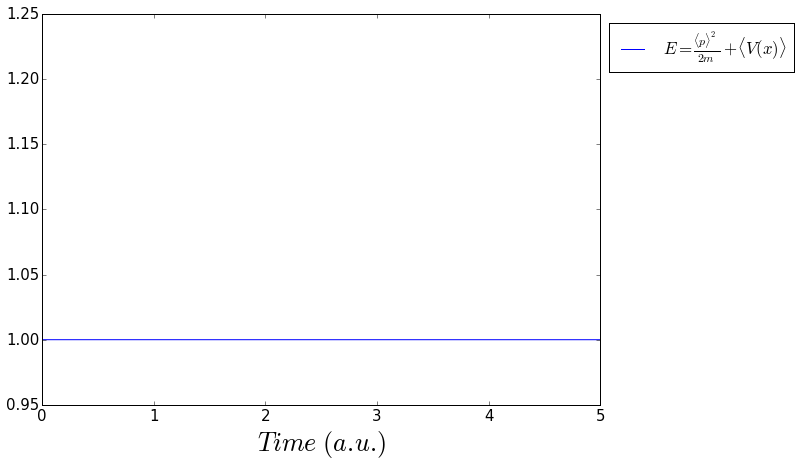

In [25]:

plt.figure(figsize=(10,7))

Total_energy = data_Expectation_P2/(2*mass) + data_Expectation_V

plot(  timeRange, np.real( Total_energy ) ,'b', label = '$ E= \\frac{\\langle p \\rangle^2}{2m} + \\langle V(x)\\rangle  $'  )   

ylim ([0.95,1.25])

xlabel("$Time \\ (a.u.)$")

legend(loc='upper left', bbox_to_anchor=(1,1))


### 8. Average values plots

In [26]:
  
# 1 st:

data_Expectation_dXdt = np.gradient(data_Expectation_X,dt) 
data_Expectation_P_mass = np.array( data_Expectation_P )/mass
    
# 2 nd:

data_Expectation_dPdt =np.gradient(data_Expectation_P,dt)

    
# 3 rd :

data_Expectation_dX2dt = np.gradient(data_Expectation_X2,dt)
data_Expectation_XP_PX_m = 2*np.array(data_Expectation_XP)/mass

# 4 th: 

data_Expectation_dP2dt= np.gradient(data_Expectation_P2,dt)
data_Expectation_pdVdx_dVdxp= -2*np.array(data_Expectation_PdVdX)
    
# Virial:
    
data_Expectation_d_PX_XP_dt = np.array(np.gradient(data_Expectation_XP,dt))+ np.array(np.gradient(data_Expectation_PX,dt))  
data_Expectation_virial = 2*np.array(data_Expectation_P2)/mass -2*np.array(data_Expectation_XdVdX)
    
    
# Uncertainty Principle

data_Expectation_sigmaX_sigmaP = np.sqrt(np.array(data_Expectation_X2).real- np.array(data_Expectation_X).real**2) * np.sqrt(np.array(data_Expectation_P2).real - np.array(data_Expectation_P).real**2)  
    
    
# Purity 

data_purity = 2*np.pi*np.array(data_Integral_W2)


Ehrenfest's theorems: 
    
$$ \frac{d \langle x \rangle }{dt}=\frac{\langle p\rangle}{m}  $$

$$ \frac{d \langle p \rangle}{dt} = -\langle U'(x) \rangle $$

$$ \frac{d \langle x^2 \rangle}{dt} = \frac{1}{m}\langle x p  +  p x \rangle $$

$$ \frac{d \langle p^2 \rangle }{dt} =  - \langle pU'(x) + U'(x)p \rangle $$

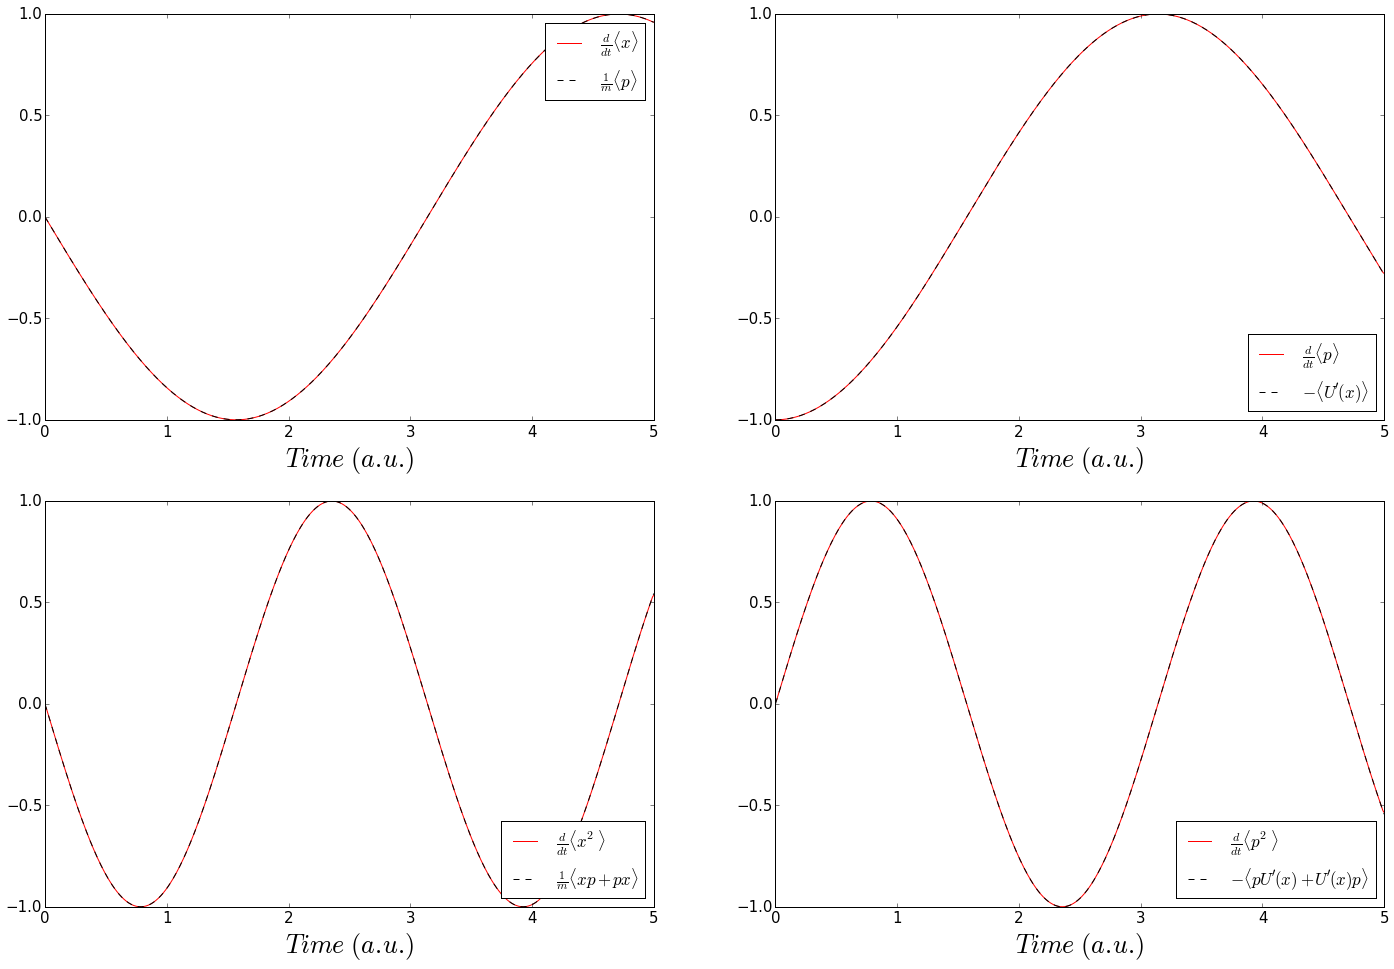

In [27]:
# Plots 

plt.figure(figsize=(24,16))

ax1 = subplot(221)

plot(  timeRange,  data_Expectation_dXdt , 'r',label = '$ \\frac{d}{dt} \\langle x \\rangle $'  )
plot(  timeRange,  data_Expectation_P_mass  ,'k--', label = '$ \\frac{1}{m} \\langle p \\rangle $'  )
xlabel("$Time \\ (a.u.)$")
legend(loc = "upper right")

ax2 = subplot(222)

plot(timeRange, data_Expectation_dPdt  ,'r'   , label = '$ \\frac{d}{dt} \\langle p \\rangle $' )
plot(timeRange, data_Expectation_F , 'k--',label = "$ -\\langle  U'(x) \\rangle $" )
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")

ax3 = subplot(223)

plot(timeRange, data_Expectation_dX2dt ,'r',label = '$ \\frac{d}{dt} \\langle x^2 \\rangle $' )
plot(timeRange, data_Expectation_XP_PX_m  ,'k--',label = '$ \\frac{1}{m} \\langle xp   + px \\rangle $' )
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")

ax4 = subplot(224)

plot( timeRange, data_Expectation_dP2dt ,'r',label = '$ \\frac{d}{dt} \\langle p^2 \\rangle $' )
plot(timeRange,  data_Expectation_pdVdx_dVdxp,'k--',label = "$ -\\langle pU'(x) + U'(x)p \\rangle $" )
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")


Virial theorem :
$$ \frac{d }{dt}\langle x p + p x  \rangle  =  \frac{ \\2 \langle p^2 \rangle }{m} - 2 \langle x V'(x) \rangle  $$
Purity condition:
$$2\pi \hbar \int W^{2}(x,p)dxdp=1$$
Uncertainty principle:
$$  \sigma_x \sigma_p  \geqslant   0.5 $$

Min sigmaXsigmaP : 0.5

Min value of Purity= (1+1.89686736221e-14j) Max. value of Purity= (1+0j)


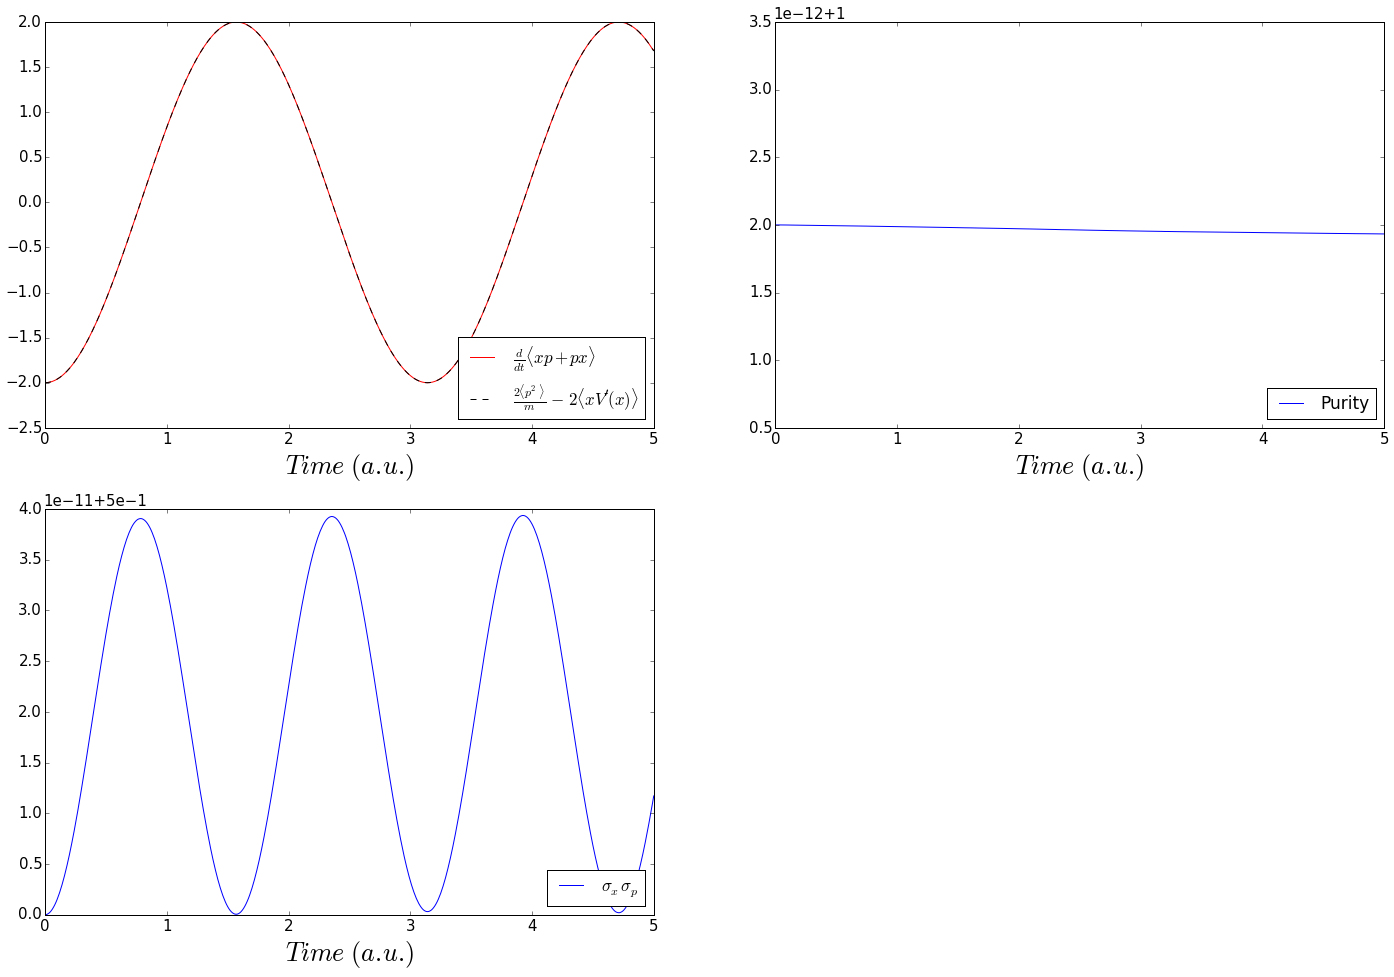

In [28]:
plt.figure(figsize=(24,16))

ax1 = subplot(221)

plot(timeRange, data_Expectation_d_PX_XP_dt,'r',label = '$ \\frac{d}{dt} \\langle xp + px \\rangle $' )
plot( timeRange, data_Expectation_virial,'k--',
                 label = "$ \\frac{ 2\\langle p^2 \\rangle}{m} \\ - \\ 2 \\langle x V'(x) \\rangle $" )
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")

ax2 = subplot(222)

plot( timeRange, data_purity.real, label = 'Purity' )
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")

ax3 = subplot(223)

plot( timeRange, data_Expectation_sigmaX_sigmaP.real, label = '$ \sigma_x \sigma_p $')
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")

print "Min sigmaXsigmaP :" ,np.min(data_Expectation_sigmaX_sigmaP.real)
print ""
print "Min value of Purity=", np.min(data_purity) ,  "Max. value of Purity=", np.max(data_purity)
